In [17]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import random
import numpy as np

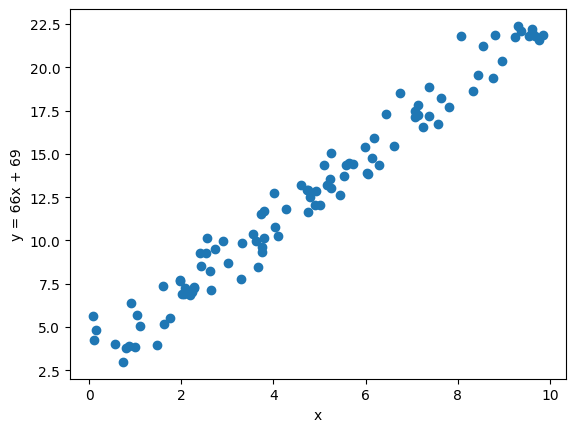

In [27]:
# So diem du lieu
n_points = 100
a = random.randint(10, 100)
b = random.randint(10, 100)
# Tao du lieu random
X = 10 * np.random.rand(n_points, 1)
y = 2 * X + 3 + np.random.randn(n_points, 1)

plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y = " + str(a)+"x + " + str(b))
plt.show()

In [34]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        input_size = 1
        output_size = 1
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)

Epoch [100/1000], Loss: 1.9398
Epoch [200/1000], Loss: 1.3378
Epoch [300/1000], Loss: 1.1082
Epoch [400/1000], Loss: 1.0205
Epoch [500/1000], Loss: 0.9871
Epoch [600/1000], Loss: 0.9743
Epoch [700/1000], Loss: 0.9695
Epoch [800/1000], Loss: 0.9676
Epoch [900/1000], Loss: 0.9669
Epoch [1000/1000], Loss: 0.9666


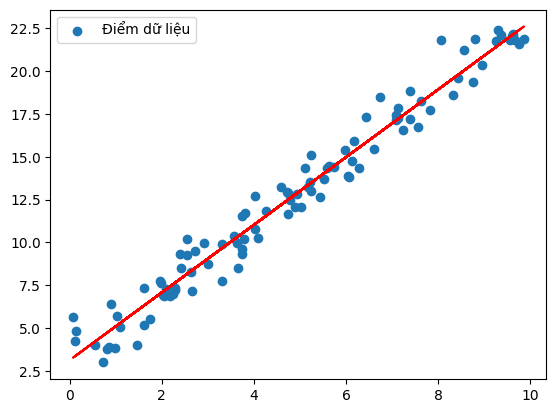

In [35]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

model = LinearRegression()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Trực quan hóa dữ liệu và đường thẳng dự đoán
predicted = model(X_tensor).detach().numpy()
plt.scatter(X, y, label='Điểm dữ liệu')
plt.plot(X, predicted, 'r-')
plt.legend()
plt.show()
